In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r'C:\Users\javid.shiriyev\Documents\respy')

In [3]:
from _grids import OneDimRecCuboid
from onephase._finite_difference import ImplicitSolver1D

# Creating Grids

In [4]:
grids = OneDimRecCuboid(4000,20000,100)

In [5]:
grids.set_permeability(100.)

In [6]:
grids.set_porosity(0.2)

# Fluid Properties

In [7]:
class fluid:
    def __init__(self,viscosity):
        """viscosity in cp"""
        self._viscosity = viscosity*0.001
    @property
    def viscosity(self):
        return self._viscosity/0.001

In [8]:
oil = fluid(5)

# Implicit Solution

In [9]:
sol = ImplicitSolver1D(grids,oil,1e-5)

In [10]:
sol.initialize(3000)
sol.set_Tvector()
sol.set_Tmatrix()
sol.set_Amatrix(dt=5)
sol.set_Jmatrix()
sol.set_Qvector(Pbound=1000)

In [11]:
Psol = sol.solve(10)

# Plotting Results

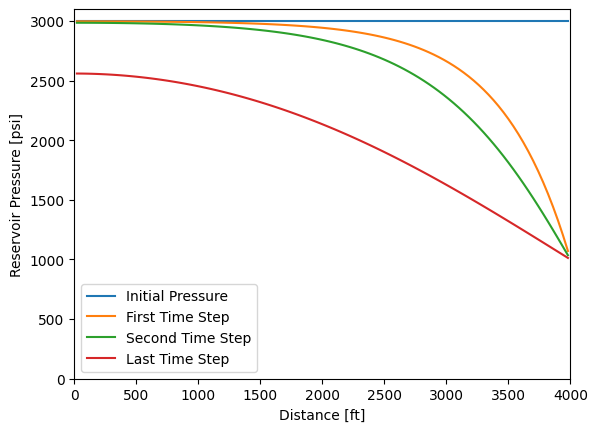

In [12]:
plt.plot(grids.xaxis,sol.pinit,label='Initial Pressure')
plt.plot(grids.xaxis,Psol[:,0],label='First Time Step')
plt.plot(grids.xaxis,Psol[:,1],label='Second Time Step')
plt.plot(grids.xaxis,Psol[:,-1],label='Last Time Step')

plt.xlim((0,4000))
plt.ylim(ymin=0)

plt.xlabel("Distance [ft]")
plt.ylabel("Reservoir Pressure [psi]")

plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

from A132_single_phase_flow_analytical import CoreFlow as analytical
from A132_single_phase_flow_numerical import CoreFlow as numerical

k = 10      #mD
phi = 0.2   #ndim
mu = 0.1    #cp
ct = 1e-5   #1/psi

coeff = 6894.76*9.869233e-16/1e-3 # conversion to SI unit

eta = k/(phi*mu*ct)*coeff # m2/second

L = 2       #m

Pi = 689476 #Pascal
Pr = 101325 #Pascal

t_1 = 0.001 #second
t_2 = 0.010 #second
t_3 = 0.050 #second
t_4 = 0.100 #second
t_5 = 0.300 #second
t_6 = 0.500 #second
t_7 = 1.000 #second

xa,P1a = analytical.solve(L,t_1,Pi,Pr,eta,200)
# xa,P2a = analytical.solve(L,t_2,Pi,Pr,eta,200)
xa,P3a = analytical.solve(L,t_3,Pi,Pr,eta,200)
# xa,P4a = analytical.solve(L,t_4,Pi,Pr,eta,200)
# xa,P5a = analytical.solve(L,t_5,Pi,Pr,eta,200)
# xa,P6a = analytical.solve(L,t_6,Pi,Pr,eta,200)
xa,P7a = analytical.solve(L,t_7,Pi,Pr,eta,200)

xn,P1n = numerical.solve(L,t_1,Pi,Pr,eta,20,10)
# xn,P2n = numerical.solve(L,t_2,Pi,Pr,eta,20,10)
xn,P3n = numerical.solve(L,t_3,Pi,Pr,eta,20,10)
# xn,P4n = numerical.solve(L,t_4,Pi,Pr,eta,20,10)
# xn,P5n = numerical.solve(L,t_5,Pi,Pr,eta,20,10)
# xn,P6n = numerical.solve(L,t_6,Pi,Pr,eta,20,10)
xn,P7n = numerical.solve(L,t_7,Pi,Pr,eta,20,10)

plt.plot(xa,P1a/6894.76,color='black',linewidth=0.9,linestyle='solid')
# plt.plot(xa,P2a/6894.76,color='black',linewidth=0.8,linestyle=(0,(5,1)))
plt.plot(xa,P3a/6894.76,color='black',linewidth=0.7,linestyle=(0,(5,1)))
# plt.plot(xa,P4a/6894.76,color='black',linewidth=0.6,linestyle='dashed')
# plt.plot(xa,P5a/6894.76,color='black',linewidth=0.5,linestyle='dashed')
# plt.plot(xa,P6a/6894.76,color='black',linewidth=0.4,linestyle='dashed')
plt.plot(xa,P7a/6894.76,color='black',linewidth=0.3,linestyle='dashed')

plt.scatter(xn,P1n/6894.76,color='red')
# plt.scatter(xn,P2n/6894.76,color='red')
plt.scatter(xn,P3n/6894.76,color='red')
# plt.scatter(xn,P4n/6894.76,color='red')
# plt.scatter(xn,P5n/6894.76,color='red')
# plt.scatter(xn,P6n/6894.76,color='red')
plt.scatter(xn,P7n/6894.76,color='red')

plt.ylabel('Pressure [psi]')
plt.xlabel('x-axis [m]')

plt.show()
